This is going to be very simple neural network model to classify the pizza type based on some input features. Maybe we will get the 100% accuracy here as its a very simple classification task but it does not happen often that you get perfect accuracy.

In [25]:
pip install keras_tuner --upgrade

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras import Model
import keras_tuner

In [54]:
data = pd.read_csv('pizza_types.csv' , index_col = 0)
data.head()
X.shape

(5520, 15)

In [57]:
X = data.iloc[0:, 0:15]
Y = data.iloc[0:,15:18]
Y_train.shape

(4416, 3)

In [37]:
from sklearn.model_selection import train_test_split
X_train ,  X_test ,  Y_train, Y_test = train_test_split(X , Y , test_size = 0.2)
X_train.shape

(4416, 15)

In [46]:
# we will start with model construction with the help of keras tuner
def build_model(hp):
  model  = Sequential()
  model.add(layers.Dense(units = hp.Int('Dense_1_unit' , min_value = 32 ,
                                        max_value = 64) , activation = 'relu' ,
                         input_shape = (X_train.shape[1],)))
  model.add(layers.Dense(3, activation = 'softmax'))

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning rate', values = [0.001,0.01,0.1])),
                loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model


In [47]:
#now we have to search for the best hyperparameters through keras_tuner RandomSearch
from keras_tuner import RandomSearch
tuner = RandomSearch(build_model , objective = 'val_accuracy', max_trials = 5)
tuner.search(X_train, Y_train, epochs = 3, validation_data = (X_test, Y_test))


Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.9846014380455017

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 13m 28s


In [50]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 38)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             117 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 725 (2.83 KB)

 Trainable params: 725 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(X_train, Y_train, epochs = 15, validation_data = (X_test, Y_test))

Epoch 1/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.5106e-08 - val_accuracy: 1.0000 - val_loss: 1.6197e-08
Epoch 2/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9727e-08 - val_accuracy: 1.0000 - val_loss: 1.4793e-08
Epoch 3/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0888e-08 - val_accuracy: 1.0000 - val_loss: 1.3497e-08
Epoch 4/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8244e-08 - val_accuracy: 1.0000 - val_loss: 1.2310e-08
Epoch 5/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9234e-08 - val_accuracy: 1.0000 - val_loss: 1.1770e-08
Epoch 6/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0737e-08 - val_accuracy: 1.0000 - val_loss: 1.1014e-08
Epoch 7/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2366e-08 - val_accuracy: 1.0000 - val_loss: 9.9341e-09
Epoch 8/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

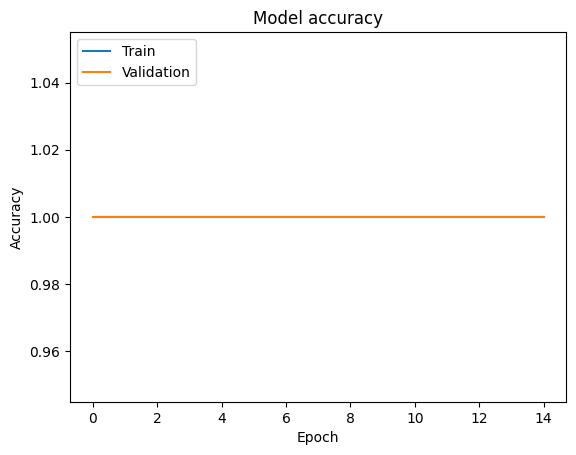

In [60]:
import matplotlib.pyplot as plt
# Get training history
#history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test))

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
#checking the metrics for the unseen data
loss,accuracy = model.evaluate(X_test , Y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0669e-09


In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [64]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

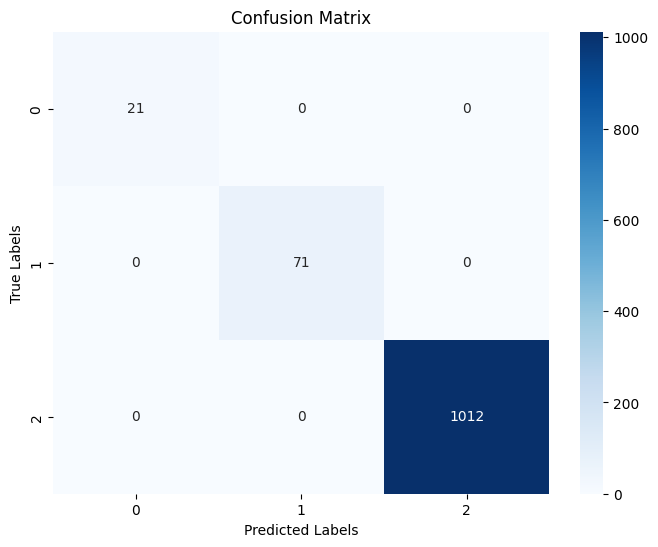

In [65]:
# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()